# Implementation of Logistic Regression
This post was inspiration from the following website https://stats.idre.ucla.edu/r/dae/logit-regression/ . On that website, Logistic regression was applied on the statistical program R. We will use the python for logistic regression with the same dataset.

In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv', header=0)
data = data.dropna() #It delete the empty row
print(data.shape)
print(list(data.columns))

(400, 4)
['admit', 'gre', 'gpa', 'rank']


We have three independent variables "gre" , "gpa" and "rank", one dependent variable admit (1/0).

GRE : Graduate Record Exam scores

GPA : Grade point average 

rank: Prestige of the undergraduate institution

The response variable, admit/don’t admit, is a binary variable.

We will treat the variables gre and gpa as continuous

The variable rank takes on the values from 1 to 4.  Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

admit    0
gre      0
gpa      0
rank     0
dtype: int64


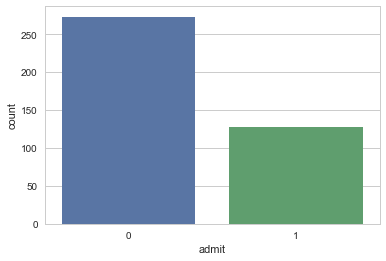

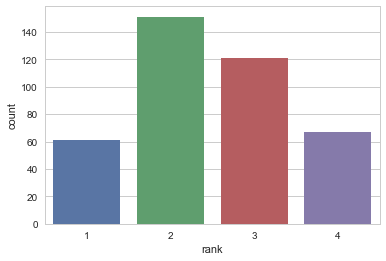

In [8]:
print(data.isnull().sum()) # check the missing variable
sns.countplot(x='admit',data=data)
plt.show()
sns.countplot(x="rank", data=data)
plt.show()

I evaluated the coefficient of correlation to investigate whether there is a relationship between the independent variables.
For example,if the coefficient of correlation between the independent variable is bigger than .5, or approximately 1. This means that there is strongly correelation between those two variables. So how to decide which one should be choose of them?

In [10]:
data.corr() 

,admit,gre,gpa,rank
admit,1.000000,0.184434,0.178212,-0.242513
gre,0.184434,1.000000,0.384266,-0.123447
gpa,0.178212,0.384266,1.000000,-0.057461
rank,-0.242513,-0.123447,-0.057461,1.000000


In [11]:
#As the Rank datsaset is categorical data, it was transformed to binary case. If I didn't do that, what would have been happened?
data2 = pd.get_dummies(data, columns =['rank']) 

In [13]:
data2.corr()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
admit,1.000000,0.184434,0.178212,0.203651,0.067109,-0.121800,-0.133356
gre,0.184434,1.000000,0.384266,0.088622,0.056202,-0.073200,-0.068235
gpa,0.178212,0.384266,1.000000,0.070550,-0.057867,0.074490,-0.084428
rank_1,0.203651,0.088622,0.070550,1.000000,-0.330334,-0.279354,-0.190274
rank_2,0.067109,0.056202,-0.057867,-0.330334,1.000000,-0.512837,-0.349304
rank_3,-0.121800,-0.073200,0.074490,-0.279354,-0.512837,1.000000,-0.295397
rank_4,-0.133356,-0.068235,-0.084428,-0.190274,-0.349304,-0.295397,1.000000


In [28]:
#I splitted the dataset
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
#The model is working now, and it will find optimal $\theta$ which is endowed from theoretical lectucer for logistic regression.
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

[[67  3]
 [26  4]]
Accuracy of logistic regression classifier on test set: 0.71
             precision    recall  f1-score   support

          0       0.72      0.96      0.82        70
          1       0.57      0.13      0.22        30

avg / total       0.68      0.71      0.64       100

